In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import random
import plotly.subplots as sp

In [2]:
def estimate_coef(x, y): 
    n = np.size(x) 
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1) 
def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    y_pred = b[0] + b[1]*x 
    plt.plot(x, y_pred, color = "g") 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show() 

In [3]:
df = pd.read_csv('./inv3_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\1480485237.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('./inv3_emi_data_t345678.csv',


In [4]:
df['time'] = df.index
df=df[(df['Inverter status']=='Grid connected')]
df= df[['Irradiance(W/㎡)','Total input power(kW)']]
df=df[df['Total input power(kW)']>0]
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())
df.loc[:,'stt']=pd.Series((df['date_ordinal']-738217-20), df.index)
df=df[df['stt']>=0]
df0=df
df0.loc[:,'Hieu suat']=pd.Series((df0['Total input power(kW)']/df0['Irradiance(W/㎡)']/2.172/1.303/220*1000*100), df0.index)
df0=df0[df0['Hieu suat']>17]
df0=df0[df0['Hieu suat']<21]
df0=df0[df0['Irradiance(W/㎡)']>950]
df0=df0[df0['Irradiance(W/㎡)']<1050]
df0.head(10)

,Irradiance(W/㎡),Total input power(kW),year,month,day,hour,dayofweek,dayname,hourofweek,hourofmonth,date,date_ordinal,stt,Hieu suat
datetime,,,,,,,,,,,,,,
2022-03-23 12:20:00,959.2,103.315,2022,3,23,12,2,Wednesday,60,540,2022-03-23,738237,0,17.299251
2022-03-23 12:35:00,975.6,109.569,2022,3,23,12,2,Wednesday,60,540,2022-03-23,738237,0,18.038025
2022-03-24 10:35:00,951.7,105.661,2022,3,24,10,3,Thursday,82,562,2022-03-24,738238,1,17.831494
2022-03-24 10:45:00,979.3,106.431,2022,3,24,10,3,Thursday,82,562,2022-03-24,738238,1,17.455226
2022-03-24 11:40:00,1007.8,110.056,2022,3,24,11,3,Thursday,83,563,2022-03-24,738238,1,17.539308
2022-03-24 11:50:00,1021.8,110.952,2022,3,24,11,3,Thursday,83,563,2022-03-24,738238,1,17.439833
2022-03-24 12:50:00,960.6,104.528,2022,3,24,12,3,Thursday,84,564,2022-03-24,738238,1,17.476849
2022-03-25 10:40:00,956.7,102.753,2022,3,25,10,4,Friday,106,586,2022-03-25,738239,2,17.250108
2022-03-25 11:00:00,950.1,102.093,2022,3,25,11,4,Friday,107,587,2022-03-25,738239,2,17.258368


In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df0.index,
    y=df0['Hieu suat'],
    name="Hiệu suất inverter 3 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig.update_layout(legend_orientation="h")
fig.show()

In [6]:
df1=df0[df0.groupby(['month','date'])['Hieu suat'].transform(max)==df0['Hieu suat']]

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất cao nhất mỗi ngày inverter 3 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig.update_layout(legend_orientation="h")
fig.show()

In [8]:
df2=df0[df0.groupby(['month','date'])['Total input power(kW)'].transform(max)==df0['Total input power(kW)']]

In [9]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=df2['Hieu suat'],
    name="Hiệu suất theo công cao nhất mỗi ngày inverter 3 "))
fig2 . update_traces (
    showlegend = True 
    )
fig2.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig2.update_layout(legend_orientation="h")
fig2.show()

Estimated coefficients:
b_0 = 17.7225411471833
b_1 = -0.003658214620505305


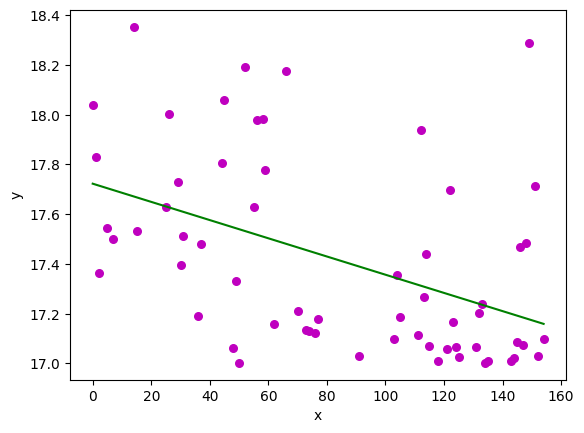

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\1443605160.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\1443605160.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df_bin = df1[['Hieu suat','month','stt']] 
x = len(df_bin)
num_index = range(0,x,1)
a=df_bin['stt'][x-1]
df_bin =  df_bin.reset_index()
df_bin.head() 
x=df_bin['stt'].tolist()
y=df_bin['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
mymodel = np.poly1d(np.polyfit(x, y, 1))
myline = np.linspace(0, a, 100)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=x,
    y=y,
    name="Hiệu suất"))
fig1.add_trace(go.Scatter(
    x=myline,
    y=mymodel(myline),
    name="Hiệu suất khớp"))
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred= b[0] + b[1]*x
df1.loc[:,'hstt']=pd.Series((df1['stt']*b[1]+b[0]), df.index)
df1.loc[:,'saiso']=pd.Series(((df1['Hieu suat']-df1['hstt'])/df1['hstt']), df.index)
df1=df1[abs(df1['saiso'])<=0.03]
fig1.add_trace(go.Scatter(
    x=myline,
    y=b[0]-b[0]/100/365*myline,
    name="Hiệu suất lt"))
fig1.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig1.update_layout(legend_orientation="h")
fig1.show()

Estimated coefficients:
b_0 = 17.695437405101043
b_1 = -0.004169528227244556


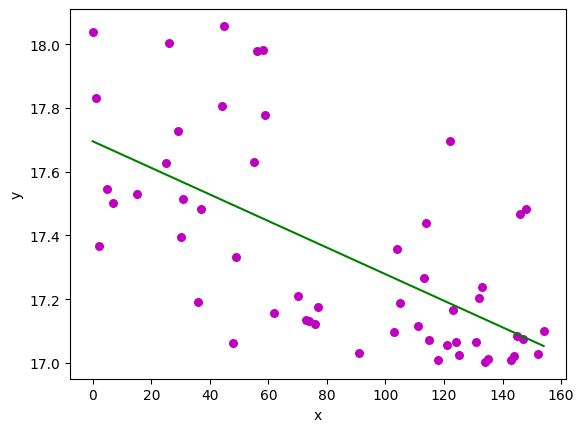

0.40276852012373254


In [11]:
df_bin = df1[['Hieu suat','month','stt']] 
x = len(df_bin)
num_index = range(0,x,1)
a=df_bin['stt'][x-1]
df_bin =  df_bin.reset_index()
df_bin.head() 
x=df_bin['stt'].tolist()
y=df_bin['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
mymodel = np.poly1d(np.polyfit(x, y, 1))
myline = np.linspace(0, a, 100)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=x,
    y=y,
    name="Hiệu suất"))
fig1.add_trace(go.Scatter(
    x=myline,
    y=mymodel(myline),
    name="Hiệu suất tuyến tính"))
fig1.update_layout(yaxis_range=[16.5, 18.5])
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred1= b[0] + b[1]*x
df1.loc[:,'hstt2']=pd.Series((df1['stt']*b[1]+b[0]), df.index)
fig1.add_trace(go.Scatter(
    x=myline,
    y=b[0]-b[0]/100/365*myline,
    line=dict(color='purple'),
    name="Hiệu suất lt"))
fig1.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig1.update_layout(legend_orientation="h")
fig1.show()
r2 = r2_score(y, y_pred1)
print(r2)

In [12]:
a=0
ngaydubao=1000
hs=[]
z=z0=200
fig3 = go.Figure()
ngay=list(range(a,a+z))
myline=np.linspace(a, a+z, z+1)
fig3.add_trace(go.Scatter(
        x=myline,
        y=b[0]-b[0]/100/365*(a)+b[1]*(myline-a),
        name="baotri",
        line=dict(color='green'),
        mode="lines"
    ))
for i in ngay:
    hs.append(b[0]-b[0]/100/365*(a)+b[1]*(i-a))
print(ngay)
myline=np.linspace(a, a+ngaydubao-1, ngaydubao)
fig3.add_trace(go.Scatter(
    x=myline,
    y=mymodel(myline),
    name="Hiệu suất dự báo"))
fig3.add_trace(go.Scatter(
    x=myline,
    y=b[0]-b[0]/100/365*myline,
    name="Hiệu suất lt",
    line=dict(color='blue')))
while z<=ngaydubao-z0:
    myline=np.linspace(a+z, a+z+z0, z0+1)
    fig3.add_trace(go.Scatter(
        x=myline,
        y=b[0]-b[0]/100/365*(a+z)+b[1]*(myline-a-z),
        name="baotri",
        line=dict(color='green'),
        mode="lines"
    ))
    ngay=list(range(a+z,a+z+z0))
    for i in ngay:
        hs.append(b[0]-b[0]/100/365*(a+z)+b[1]*(i-a-z))
    z=z+z0
if int(ngaydubao/z0)!=(ngaydubao/z0):
    myline=np.linspace(a+z, a+ngaydubao-1, ngaydubao-z)
    fig3.add_trace(go.Scatter(
        x=myline,
        y=b[0]-b[0]/100/365*(a+z)+b[1]*(myline-a-z),
        name="baotri",
        line=dict(color='green'),
        mode="lines"))
    ngay=list(range(a+z, a+ngaydubao))
    for i in ngay:
        hs.append(b[0]-b[0]/100/365*(a+z)+b[1]*(i-a-z))
fig3.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig3.update_layout(legend_orientation="h")
fig3.show()
print(hs)
solanbaotri=int(ngaydubao/z0)
if solanbaotri==ngaydubao/z0:
    solanbaotri=solanbaotri-1
print(solanbaotri)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


[17.695437405101043, 17.6912678768738, 17.687098348646554, 17.68292882041931, 17.678759292192066, 17.67458976396482, 17.670420235737573, 17.66625070751033, 17.662081179283085, 17.65791165105584, 17.653742122828596, 17.649572594601352, 17.645403066374108, 17.641233538146864, 17.63706400991962, 17.632894481692375, 17.62872495346513, 17.624555425237887, 17.62038589701064, 17.616216368783395, 17.61204684055615, 17.607877312328906, 17.603707784101662, 17.599538255874418, 17.595368727647173, 17.59119919941993, 17.587029671192685, 17.58286014296544, 17.578690614738196, 17.574521086510952, 17.570351558283704, 17.56618203005646, 17.562012501829216, 17.55784297360197, 17.553673445374727, 17.549503917147483, 17.54533438892024, 17.541164860692994, 17.53699533246575, 17.532825804238506, 17.52865627601126, 17.524486747784017, 17.52031721955677, 17.516147691329525, 17.51197816310228, 17.507808634875037, 17.503639106647793, 17.49946957842055, 17.495300050193304, 17.49113052196606, 17.486960993738816, 

In [13]:
ngay={'ngay' : list(range(a,a+ngaydubao))}
print(ngay)
df3 = pd.read_csv('./irradiation.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[0]},
                index_col=['datetime']
                )
df3.loc[:,'date'] = pd.Series(df3.index.date, df3.index)
df3['date_ordinal'] = pd.to_datetime(df3['date']).apply(lambda date: date.toordinal())
df3.loc[:,'stt']=pd.Series((df3['date_ordinal']-738217-20), df3.index)
df3.loc[:,'hsdubao']=pd.Series((df3['stt']*b[1]+b[0]), df3.index)
df3.loc[:,'hslt']=pd.Series((-df3['stt']*b[0]/100/365+b[0]), df3.index)
df3.loc[:,'Sanluonglt']=pd.Series((df3['Irradiation']*df3['hslt']*2.172*1.303*220/1000/100), df3.index)
df3.loc[:,'Sanluongdubao']=pd.Series((df3['Irradiation']*df3['hsdubao']*2.172*1.303*220/1000/100), df3.index)
df3['hsbaotri'] = hs
df3.loc[:,'Sanluongbaotri']=pd.Series((df3['Irradiation']*df3['hsbaotri']*2.172*1.303*220/1000/100), df3.index)
df4=df3
df5=df3
df3.head(1000)

{'ngay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\1860520646.py:3: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,Irradiation,date,date_ordinal,stt,hsdubao,hslt,Sanluonglt,Sanluongdubao,hsbaotri,Sanluongbaotri
datetime,,,,,,,,,,
2022-03-23,5005.6,2022-03-23,738237,0,17.695437,17.695437,551.498533,551.498533,17.695437,551.498533
2022-03-24,5005.6,2022-03-24,738238,1,17.691268,17.694953,551.483424,551.368585,17.691268,551.368585
2022-03-25,5005.6,2022-03-25,738239,2,17.687098,17.694468,551.468314,551.238637,17.687098,551.238637
2022-03-26,5005.6,2022-03-26,738240,3,17.682929,17.693983,551.453204,551.108689,17.682929,551.108689
2022-03-27,5005.6,2022-03-27,738241,4,17.678759,17.693498,551.438095,550.978741,17.678759,550.978741
...,...,...,...,...,...,...,...,...,...,...
2024-12-12,2352.8,2024-12-12,739232,995,13.546757,17.213055,252.156335,198.448246,16.494534,241.630629
2024-12-13,2352.8,2024-12-13,739233,996,13.542587,17.212570,252.149233,198.387166,16.490365,241.569549
2024-12-14,2352.8,2024-12-14,739234,997,13.538418,17.212085,252.142131,198.326086,16.486195,241.508469


In [14]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['hslt'],
    name="lý thuyết"))
fig4.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['hsdubao'],
    name="dự báo"))
fig4.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['hsbaotri'],
    name="bảo trì"))
fig4.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Hiệu suất (%)"
)
fig4.update_layout(legend_orientation="h")
fig4.show()

In [15]:
i=0
sllt=0
tsllt=[]
sldb=0
tsldb=[]
slbt=0
tslbt=[]
for i in range(0,len(df3['stt'])):
    sllt=sllt+df3['Sanluonglt'][i]
    tsllt.append(sllt)
    sldb=sldb+df3['Sanluongdubao'][i]
    tsldb.append(sldb)
    slbt=slbt+df3['Sanluongbaotri'][i]
    tslbt.append(slbt)
    i=i+1
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=tsllt,
    name="lý thuyết"))
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=tsldb,
    name="dự báo"))
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=tslbt,
    name="bảo trì"))
fig4.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Sản lượng (Kwh)"
)
fig4.update_layout(legend_orientation="h")
fig4.show()

In [16]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=df3['Irradiation'],
    name=" dự báo"))
fig4.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Irrdiation(Wh/m^2)"
)

In [17]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=df3['Sanluonglt'],
    name="Sản lượng lý thuyết"))
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=df3['Sanluongdubao'],
    name="Sản lượng dự báo"))
fig4.add_trace(go.Scatter(
    x=df3['stt'],
    y=df3['Sanluongbaotri'],
    name="Sản lượng bảo trì"))
fig4.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Sản lượng (Kwh)"
)
fig4.update_layout(legend_orientation="h")
fig4.show()

In [18]:
def tinh_tien_dien(so_dien):
    if so_dien <= 50:
        tien_dien = so_dien * 1728
    elif so_dien <= 100:
        tien_dien = 50 * 1728 + (so_dien - 50) * 1786
    elif so_dien <=200:
        tien_dien = 50 * 1728 + 50 * 1786 + (so_dien - 100) * 2074
    elif so_dien <=300:
        tien_dien = 50 * 1728 + 50 * 1786 + 100 * 2074 + (so_dien - 200) * 2612
    elif so_dien <=400:
        tien_dien = 50 * 1728 + 50 * 1786 + 100 * 2074 + 100 * 2612 + (so_dien - 300) * 2919
    else:
        tien_dien = 50 * 1728 + 50 * 1786 + 100 * 2074 + 100 * 2612 + 100 * 2919 + (so_dien - 400) * 3015
    return tien_dien

In [19]:
sum_a=df3['Sanluongdubao'].sum()
sum_b=df3['Sanluongbaotri'].sum()
tietkiem=sum_b
tiendien=tinh_tien_dien(tietkiem)
tienloi=tiendien-solanbaotri*2000000
print('số lần bảo trì:',solanbaotri)
print('số điện tiết kiệm:',tietkiem)
print('số tiền tiết kiệm:',tienloi)

số lần bảo trì: 4
số điện tiết kiệm: 509755.1403213586
số tiền tiết kiệm: 1528641948.068896


In [20]:
df4.loc[:,'year'] = pd.Series(df4.index.year, df4.index)
df4.loc[:,'month'] = pd.Series(df4.index.month, df4.index)
df4.loc[:,'day'] = pd.Series(df4.index.day, df4.index)
df4=df4.groupby(['year','month'])['Irradiation'].sum()
df4=df4.reset_index()
df4['tháng-năm'] = df4['month'].astype(str) + '-' + df4['year'].astype(str)
df4.head(1000)

,year,month,Irradiation,tháng-năm
0,2022,3,45050.4,3-2022
1,2022,4,168999.0,4-2022
2,2022,5,190907.3,5-2022
3,2022,6,175332.0,6-2022
4,2022,7,196676.4,7-2022
5,2022,8,178938.2,8-2022
6,2022,9,149418.0,9-2022
7,2022,10,123051.4,10-2022
8,2022,11,83583.0,11-2022
9,2022,12,72936.8,12-2022


In [21]:
fig6 = go.Figure()
fig6.add_trace(go.Scatter(
    x=df4['tháng-năm'],
    y=df4['Irradiation'],
    name="Irradiation"))
fig6.update_layout(
    xaxis_title="Ngày",
    yaxis_title="Irradiation (Wh/m^2)"
)

In [22]:
df5.loc[:,'year'] = pd.Series(df5.index.year, df5.index)
df5.loc[:,'month'] = pd.Series(df5.index.month, df5.index)
df5.loc[:,'day'] = pd.Series(df5.index.day, df5.index)
df5=df5.groupby(['year','month'])[['hslt','hsbaotri','hsdubao']].mean()
df5=df5.reset_index()
df5['tháng-năm'] = df5['month'].astype(str) + '-' + df5['year'].astype(str)
df5['Irradiation']=df4['Irradiation']
df5.loc[:,'Sanluonglt']=pd.Series((df5['Irradiation']*df5['hslt']*2.172*1.303*220/1000/100), df5.index)
df5.loc[:,'Sanluongdubao']=pd.Series((df5['Irradiation']*df5['hsdubao']*2.172*1.303*220/1000/100), df5.index)
df5.loc[:,'Sanluongbaotri']=pd.Series((df5['Irradiation']*df5['hsbaotri']*2.172*1.303*220/1000/100), df5.index)
df5.head(1000)

,year,month,hslt,hsbaotri,hsdubao,tháng-năm,Irradiation,Sanluonglt,Sanluongdubao,Sanluongbaotri
0,2022,3,17.693498,17.678759,17.678759,3-2022,45050.4,4962.942854,4958.808666,4958.808666
1,2022,4,17.684044,17.597453,17.597453,4-2022,168999.0,18607.698055,18516.584370,18516.584370
2,2022,5,17.669258,17.470283,17.470283,5-2022,190907.3,21002.343708,20765.834579,20765.834579
3,2022,6,17.654471,17.343112,17.343112,6-2022,175332.0,19272.711458,18932.812755,18932.812755
4,2022,7,17.639685,17.215942,17.215942,7-2022,196676.4,21600.807407,21081.909759,21081.909759
5,2022,8,17.624656,17.086686,17.086686,8-2022,178938.2,19635.891442,19036.531750,19036.531750
6,2022,9,17.609869,16.959516,16.959516,9-2022,149418.0,16382.718279,15777.685031,15777.685031
7,2022,10,17.595082,17.379110,16.832345,10-2022,123051.4,13480.462205,12896.091392,13314.995201
8,2022,11,17.580296,17.442119,16.705174,11-2022,83583.0,9148.945742,8693.524607,9077.037142
9,2022,12,17.565509,17.314948,16.578004,12-2022,72936.8,7976.904051,7528.454998,7863.118470


In [23]:
i=0
tdbt=[]
tddb=[]
for i in range(0,len(df5['Sanluongbaotri'])):
    tdbt.append(tinh_tien_dien(df5['Sanluongbaotri'][i])-solanbaotri*2000000)
    tddb.append(tinh_tien_dien(df5['Sanluongdubao'][i])-solanbaotri*2000000)
    i=i+1
df5['tdbt']=tdbt
df5['tddb']=tddb
df5.head(1000)

,year,month,hslt,hsbaotri,hsdubao,tháng-năm,Irradiation,Sanluonglt,Sanluongdubao,Sanluongbaotri,tdbt,tddb
0,2022,3,17.693498,17.678759,17.678759,3-2022,45050.4,4962.942854,4958.808666,4958.808666,6.681008e+06,6.681008e+06
1,2022,4,17.684044,17.597453,17.597453,4-2022,168999.0,18607.698055,18516.584370,18516.584370,4.755770e+07,4.755770e+07
2,2022,5,17.669258,17.470283,17.470283,5-2022,190907.3,21002.343708,20765.834579,20765.834579,5.433919e+07,5.433919e+07
3,2022,6,17.654471,17.343112,17.343112,6-2022,175332.0,19272.711458,18932.812755,18932.812755,4.881263e+07,4.881263e+07
4,2022,7,17.639685,17.215942,17.215942,7-2022,196676.4,21600.807407,21081.909759,21081.909759,5.529216e+07,5.529216e+07
5,2022,8,17.624656,17.086686,17.086686,8-2022,178938.2,19635.891442,19036.531750,19036.531750,4.912534e+07,4.912534e+07
6,2022,9,17.609869,16.959516,16.959516,9-2022,149418.0,16382.718279,15777.685031,15777.685031,3.929992e+07,3.929992e+07
7,2022,10,17.595082,17.379110,16.832345,10-2022,123051.4,13480.462205,12896.091392,13314.995201,3.187491e+07,3.061192e+07
8,2022,11,17.580296,17.442119,16.705174,11-2022,83583.0,9148.945742,8693.524607,9077.037142,1.909747e+07,1.794118e+07
9,2022,12,17.565509,17.314948,16.578004,12-2022,72936.8,7976.904051,7528.454998,7863.118470,1.543750e+07,1.442849e+07


In [24]:
print(df5['tdbt'].sum())

1255738548.068896


In [25]:
i=0
sllt=0
tsllt=[]
sldb=0
tsldb=[]
slbt=0
tslbt=[]
for i in range(0,len(df5['tháng-năm'])):
    sllt=sllt+df5['Sanluonglt'][i]
    tsllt.append(sllt)
    sldb=sldb+df5['Sanluongdubao'][i]
    tsldb.append(sldb)
    slbt=slbt+df5['Sanluongbaotri'][i]
    tslbt.append(slbt)
    i=i+1
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=df5['tháng-năm'],
    y=tsllt,
    name="lý thuyết"))
fig4.add_trace(go.Scatter(
    x=df5['tháng-năm'],
    y=tsldb,
    name="dự báo"))
fig4.add_trace(go.Scatter(
    x=df5['tháng-năm'],
    y=tslbt,
    name="bảo trì"))
fig4.update_layout(
    xaxis_title="Tháng",
    yaxis_title="Sản lượng (Kwh)"
)
fig4.update_layout(legend_orientation="v")
fig4.show()

In [26]:
fig10 = go.Figure()
fig10.add_trace(go.Scatter(
    x=df5['tháng-năm'],
    y=df5['Sanluonglt'],
    name="Sản lượng lý thuyết"))
fig10.add_trace(go.Scatter(
    x=df5['tháng-năm'],
    y=df5['Sanluongbaotri'],
    name="Sản lượng bảo trì"))
fig10.update_layout(
    xaxis_title="Tháng",
    yaxis_title="Sản lượng (Kwh)"
)
fig10.update_xaxes(
    rangeslider_visible=True
)
fig10.update_layout(legend_orientation="h")
fig10.show()

In [27]:
tk=[]
ck=[]
j=30
for j in range(30,500):
    a=0
    ngaydubao=1000
    hs=[]
    z=z0=j
    ngay=list(range(a,a+z))
    myline=np.linspace(a, a+z, z+1)
    for i in ngay:
        hs.append(b[0]-b[0]/100/365*(a)+b[1]*(i-a))
    myline=np.linspace(a, a+ngaydubao-1, ngaydubao)
    while z<=ngaydubao-z0:
        myline=np.linspace(a+z, a+z+z0, z0+1)
        ngay=list(range(a+z,a+z+z0))
        for i in ngay:
            hs.append(b[0]-b[0]/100/365*(a+z)+b[1]*(i-a-z))
        z=z+z0
    if int(ngaydubao/z0)!=(ngaydubao/z0):
        myline=np.linspace(a+z, a+ngaydubao-1, ngaydubao-z)
        ngay=list(range(a+z, a+ngaydubao))
        for i in ngay:
            hs.append(b[0]-b[0]/100/365*(a+z)+b[1]*(i-a-z))
    solanbaotri=int(ngaydubao/z0)
    if solanbaotri==ngaydubao/z0:
        solanbaotri=solanbaotri-1
    ngay={'ngay' : list(range(a,a+ngaydubao))}
    df3 = pd.read_csv('./irradiation.csv',
                    encoding="utf-8-sig",
                    header=0,
                    infer_datetime_format=True,
                    parse_dates={'datetime':[0]},
                    index_col=['datetime']
                    )
    df3.loc[:,'date'] = pd.Series(df3.index.date, df3.index)
    df3['date_ordinal'] = pd.to_datetime(df3['date']).apply(lambda date: date.toordinal())
    df3.loc[:,'stt']=pd.Series((df3['date_ordinal']-738217-20), df3.index)
    df3.loc[:,'hsdubao']=pd.Series((df3['stt']*b[1]+b[0]), df3.index)
    df3.loc[:,'hslt']=pd.Series((-df3['stt']*b[0]/100/365+b[0]), df3.index)
    df3.loc[:,'Sanluonglt']=pd.Series((df3['Irradiation']*df3['hslt']*2.172*1.303*220/1000/100), df3.index)
    df3.loc[:,'Sanluongdubao']=pd.Series((df3['Irradiation']*df3['hsdubao']*2.172*1.303*220/1000/100), df3.index)
    df3['hsbaotri'] = hs
    df3.loc[:,'Sanluongbaotri']=pd.Series((df3['Irradiation']*df3['hsbaotri']*2.172*1.303*220/1000/100), df3.index)
    df4=df3
    df5=df3
    df4.loc[:,'year'] = pd.Series(df4.index.year, df4.index)
    df4.loc[:,'month'] = pd.Series(df4.index.month, df4.index)
    df4.loc[:,'day'] = pd.Series(df4.index.day, df4.index)
    df4=df4.groupby(['year','month'])['Irradiation'].sum()
    df4=df4.reset_index()
    df4['tháng-năm'] = df4['month'].astype(str) + '-' + df4['year'].astype(str)
    df5.loc[:,'year'] = pd.Series(df5.index.year, df5.index)
    df5.loc[:,'month'] = pd.Series(df5.index.month, df5.index)
    df5.loc[:,'day'] = pd.Series(df5.index.day, df5.index)
    df5=df5.groupby(['year','month'])[['hslt','hsbaotri','hsdubao']].mean()
    df5=df5.reset_index()
    df5['tháng-năm'] = df5['month'].astype(str) + '-' + df5['year'].astype(str)
    df5['Irradiation']=df4['Irradiation']
    df5.loc[:,'Sanluonglt']=pd.Series((df5['Irradiation']*df5['hslt']*2.172*1.303*220/1000/100), df5.index)
    df5.loc[:,'Sanluongdubao']=pd.Series((df5['Irradiation']*df5['hsdubao']*2.172*1.303*220/1000/100), df5.index)
    df5.loc[:,'Sanluongbaotri']=pd.Series((df5['Irradiation']*df5['hsbaotri']*2.172*1.303*220/1000/100), df5.index)
    i=0
    tdbt=[]
    for i in range(0,len(df5['Sanluongbaotri'])):
        tdbt.append(2139*df5['Sanluongbaotri'][i])
        i=i+1
    df5['tdbt']=tdbt
    tk.append(df5['tdbt'].sum()-solanbaotri*2000000)
    ck.append(j)
    j=j+1
i=1
ck1=[]
tk1=[]
for i in range(1,len(ck)-1):
    if tk[i]>tk[i-1] and tk[i]>tk[i+1]:
        ck1.append(ck[i])
        tk1.append(tk[i])
        i=i+1
fig5 = go.Figure()
fig5.add_trace(go.Scatter(
    x=ck1,
    y=tk1,
    name="Lợi nhuận theo chu kỳ"))
fig5.update_layout(
    xaxis_title="Chu kỳ (ngày)",
    yaxis_title="Lợi nhuận (VNĐ)"
)
fig5.update_layout(legend_orientation="h")

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\2969846151.py:29: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\2969846151.py:29: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\2969846151.py:29: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argume

In [28]:
d={'Chu kỳ': ck1, 'Lợi nhuận': tk1}
df6=pd.DataFrame(data=d)
df6.head(1000)

,Chu kỳ,Lợi nhuận
0,36,1.055555e+09
1,40,1.061061e+09
2,42,1.062836e+09
3,44,1.064605e+09
4,46,1.066402e+09
5,48,1.068143e+09
6,50,1.069902e+09
7,53,1.071553e+09
8,56,1.073201e+09
9,59,1.074889e+09


In [29]:
a=0
ngaydubao=1000
hs=[]
z=z0=36
ngay=list(range(a,a+z))
myline=np.linspace(a, a+z, z+1)
for i in ngay:
    hs.append(b[0]-b[0]/100/365*(a)+b[1]*(i-a))
myline=np.linspace(a, a+ngaydubao-1, ngaydubao)
while z<=ngaydubao-z0:
    myline=np.linspace(a+z, a+z+z0, z0+1)
    ngay=list(range(a+z,a+z+z0))
    for i in ngay:
        hs.append(b[0]-b[0]/100/365*(a+z)+b[1]*(i-a-z))
    z=z+z0
if int(ngaydubao/z0)!=(ngaydubao/z0):
    myline=np.linspace(a+z, a+ngaydubao-1, ngaydubao-z)
    ngay=list(range(a+z, a+ngaydubao))
    for i in ngay:
        hs.append(b[0]-b[0]/100/365*(a+z)+b[1]*(i-a-z))
solanbaotri=int(ngaydubao/z0)
if solanbaotri==ngaydubao/z0:
    solanbaotri=solanbaotri-1
ngay={'ngay' : list(range(a,a+ngaydubao))}
df3 = pd.read_csv('./irradiation.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[0]},
                index_col=['datetime']
                )
df3.loc[:,'date'] = pd.Series(df3.index.date, df3.index)
df3['date_ordinal'] = pd.to_datetime(df3['date']).apply(lambda date: date.toordinal())
df3.loc[:,'stt']=pd.Series((df3['date_ordinal']-738217-20), df3.index)
df3.loc[:,'hsdubao']=pd.Series((df3['stt']*b[1]+b[0]), df3.index)
df3.loc[:,'hslt']=pd.Series((-df3['stt']*b[0]/100/365+b[0]), df3.index)
df3.loc[:,'Sanluonglt']=pd.Series((df3['Irradiation']*df3['hslt']*2.172*1.303*220/1000/100), df3.index)
df3.loc[:,'Sanluongdubao']=pd.Series((df3['Irradiation']*df3['hsdubao']*2.172*1.303*220/1000/100), df3.index)
df3['hsbaotri'] = hs
df3.loc[:,'Sanluongbaotri']=pd.Series((df3['Irradiation']*df3['hsbaotri']*2.172*1.303*220/1000/100), df3.index)
df4=df3
df5=df3
df4.loc[:,'year'] = pd.Series(df4.index.year, df4.index)
df4.loc[:,'month'] = pd.Series(df4.index.month, df4.index)
df4.loc[:,'day'] = pd.Series(df4.index.day, df4.index)
df4=df4.groupby(['year','month'])['Irradiation'].sum()
df4=df4.reset_index()
df4['tháng-năm'] = df4['month'].astype(str) + '-' + df4['year'].astype(str)
df5.loc[:,'year'] = pd.Series(df5.index.year, df5.index)
df5.loc[:,'month'] = pd.Series(df5.index.month, df5.index)
df5.loc[:,'day'] = pd.Series(df5.index.day, df5.index)
df5=df5.groupby(['year','month'])[['hslt','hsbaotri','hsdubao']].mean()
df5=df5.reset_index()
df5['tháng-năm'] = df5['month'].astype(str) + '-' + df5['year'].astype(str)
df5['Irradiation']=df4['Irradiation']
df5.loc[:,'Sanluonglt']=pd.Series((df5['Irradiation']*df5['hslt']*2.172*1.303*220/1000/100), df5.index)
df5.loc[:,'Sanluongdubao']=pd.Series((df5['Irradiation']*df5['hsdubao']*2.172*1.303*220/1000/100), df5.index)
df5.loc[:,'Sanluongbaotri']=pd.Series((df5['Irradiation']*df5['hsbaotri']*2.172*1.303*220/1000/100), df5.index)
fig10.add_trace(go.Scatter(
    x=df5['tháng-năm'],
    y=df5['Sanluongbaotri'],
    name="Sản lượng bảo trì chu kỳ 1 tháng"))
fig10.update_xaxes(
    rangeslider_visible=True
)
fig10.update_layout(legend_orientation="h")
fig10.show()

C:\Users\badao\AppData\Local\Temp\ipykernel_16756\1176334295.py:25: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [30]:
i=0
tdbt=[]
y=[]
for i in range(0,len(df5['Sanluongbaotri'])):
    tdbt.append(2139*df5['Sanluongbaotri'][i])
    i=i+1
df5['tdbt']=tdbt
i=0
for i in range(0,len(ck1)):
    y.append(df5['tdbt'].sum()-solanbaotri*2000000)
    i=i+1
fig5.add_trace(go.Scatter(
    x=ck1,
    y=y,
    name="Lợi nhuận chu kỳ 1 tháng"))
fig5.show()